# Spotify Listening Data Analysis

This analysis examines personal Spotify listening data to understand listening habits and patterns over time. It includes interactive visualizations and clustering analysis to provide unique insights.

In [4]:
# Load libraries and data
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from datetime import datetime
import matplotlib.pyplot as plt

# Load data
file_path = 'recently_listened_spotify_5-29_9-23.csv'
spotify_data = pd.read_csv(file_path)

# Data cleaning and initial processing
spotify_data.columns = ['Timestamp', 'Track Name', 'Artist Name', 'Track ID', 'Track URL']
spotify_data['Timestamp'] = pd.to_datetime(spotify_data['Timestamp'], errors='coerce')

# Extract hour, day, and month for further analysis
spotify_data['Hour'] = spotify_data['Timestamp'].dt.hour
spotify_data['DayOfWeek'] = spotify_data['Timestamp'].dt.day_name()
spotify_data['Month'] = spotify_data['Timestamp'].dt.month_name()
spotify_data['Date'] = spotify_data['Timestamp'].dt.date
spotify_data.head()

/var/folders/tv/13nwqtn90nj4zswmpspw54hr0000gn/T/ipykernel_12286/527261699.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spotify_data['Timestamp'] = pd.to_datetime(spotify_data['Timestamp'], errors='coerce')


,Timestamp,Track Name,Artist Name,Track ID,Track URL,Hour,DayOfWeek,Month,Date
0,2024-05-10 00:06:00,Covet - alt version,Basement,73NKI74L085oOkIxyY9sJ1,https://open.spotify.com/track/73NKI74L085oOkI...,0,Friday,May,2024-05-10
1,2024-05-10 09:59:00,Grow,Shed Theory,7Mq1IBDmEJzg4xEdOljzMT,https://open.spotify.com/track/7Mq1IBDmEJzg4xE...,9,Friday,May,2024-05-10
2,2024-05-10 10:05:00,Iceheart,Yung Lean,05i9cnJCtgfGoGIAp6NnzY,https://open.spotify.com/track/05i9cnJCtgfGoGI...,10,Friday,May,2024-05-10
3,2024-05-10 10:12:00,Keepe Out,Buckshot,3HijtUnWDjWZLkUj590oWM,https://open.spotify.com/track/3HijtUnWDjWZLkU...,10,Friday,May,2024-05-10
4,2024-05-10 10:15:00,Keepe Out,Buckshot,3HijtUnWDjWZLkUj590oWM,https://open.spotify.com/track/3HijtUnWDjWZLkU...,10,Friday,May,2024-05-10


## Interactive Hourly Listening Patterns


In [6]:
# Prepare hourly listening data
hourly_listens = spotify_data['Hour'].value_counts().sort_index()
hourly_listens_df = pd.DataFrame({'Hour': hourly_listens.index, 'Plays': hourly_listens.values})

# Plot with Plotly
fig_hourly = px.bar(hourly_listens_df, x='Hour', y='Plays', title='Hourly Listening Patterns')
fig_hourly.show()

## Interactive Monthly Listening Trends


In [12]:
# Prepare monthly listening data
monthly_listens = spotify_data['Month'].value_counts()
monthly_listens_df = pd.DataFrame({'Month': monthly_listens.index, 'Plays': monthly_listens.values})

# Plot with Plotly
fig_monthly = px.bar(monthly_listens_df, x='Month', y='Plays', title='Monthly Listening Patterns', color='Plays')
fig_monthly.show()

## Clustering Analysis on Listening Times
Using K-means clustering, we segment listening habits by hour to reveal distinct listening periods.

In [14]:
# K-means Clustering on hourly data
hourly_counts = spotify_data.groupby('Hour').size().values.reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(hourly_counts)
hourly_listens_df['Cluster'] = kmeans.labels_

# Plot clustering results
fig_cluster = px.bar(hourly_listens_df, x='Hour', y='Plays', color='Cluster', title='Hourly Listening Patterns with Clustering')
fig_cluster.show()

## Daily Listening Trends with Rolling Average
A 7-day rolling average smooths the data to reveal overall trends.

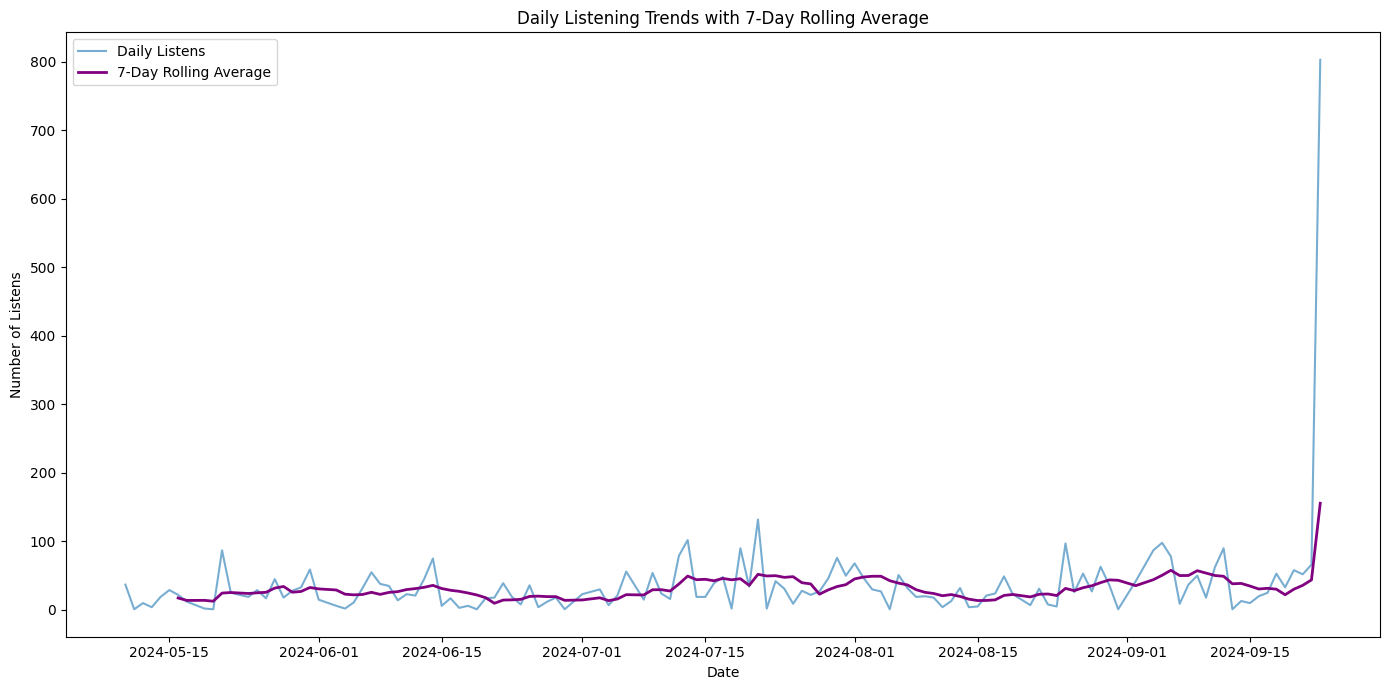

In [15]:
# Daily counts and rolling average
daily_listens = spotify_data.groupby('Date').size()
daily_listens_rolling = daily_listens.rolling(window=7).mean()

# Plot with matplotlib
plt.figure(figsize=(14, 7))
daily_listens.plot(label='Daily Listens', alpha=0.6)
daily_listens_rolling.plot(label='7-Day Rolling Average', linewidth=2, color='purple')
plt.title('Daily Listening Trends with 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of Listens')
plt.legend()
plt.tight_layout()
plt.show()

## Summary of Insights
- Top listening times, days, and months were identified.
- Clustering analysis highlighted distinct listening behavior segments.
- Rolling averages revealed trends over time.
